<a href="https://colab.research.google.com/github/ntu1988/Twitter_Sentiment_Analysis/blob/main/06_02_2024_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Twitter Sentiment Analysis

### 1) Importing the Libraries

In [ ]:
from textblob import TextBlob

In [ ]:
import tweepy

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
pip install tweepy

### 2) Connecting with the Twitter API

In [ ]:
consumer_key = "WUzr8xlmk3Agc8ga90c8nEoEw"
consumer_secret = "fbRuDPOC8XEET6xMs5xoNbAq4gbA3l2JDuHGsIXAxxi9Jh2yrU"
access_token = "1797303300129427456-fnJDMxiGh8UzuS59mwwvnBSBT0Hbqu"
access_token_secret = "zvOz53y0s31OzEg9cq51g9jIUhXVxV8SoTrakEczlgTmK"

In [ ]:
Bear_Token = "AAAAAAAAAAAAAAAAAAAAABVnuAEAAAAAqL4XArjfXJcSB%2BBU2jHcUoHg0Qo%3DIoo2r8qmcC3dXZ4Rut0oVaCYoo1sBGmq8AOgEwAb3fT3CYCVPk"

In [ ]:
client = tweepy.Client(bearer_token=Bear_Token, wait_on_rate_limit=True)

In [ ]:
search_term = "Money Heist"
no_of_tweets = 1000

In [ ]:
def get_tweets_content(query, max_results):
    tweets = []
    for tweet in tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields=['created_at', 'text'], max_results=100).flatten(limit=max_results):
        tweets.append(tweet)
    return tweets

In [ ]:
tweets = get_tweets_content(search_term, no_of_tweets)

In [ ]:
print(tweets)

[<Tweet id=1797411623721742378 text="RT @DOLLACPONE: With powers like giants and precision like a scalpel, we're plotting the greatest money heist of all time.\n\nCAPONES ALWAYS…">, <Tweet id=1797411405345235313 text='Lemme start back cleaning up &amp; watching Money Heist 🌚'>, <Tweet id=1797411345429655710 text='@Qhadireb00 Money Heist'>, <Tweet id=1797407537383330102 text='RT @MagnetusArt: The great cum heist\n\ncant wait for JCS to cover this one\n\nshadow wizard money council has declared this month be of the cu…'>, <Tweet id=1797407112957497823 text="Cryptocurrency, trading, pumping, are waiting for you today on my channel! It's time to make big money!\n\n➡️https://t.co/KDaK3AMuVw⬅️\n\n@trade_heist @Alexand91069018 @WISDOMD77610893 @yatirimdnsmni">, <Tweet id=1797406692923048055 text='RT @DOLLACPONE: JUST THE BIGGEST MONEY HEIST EVER… $CPONE ON SOL ….\n\nJOIN THE TELEGRAM GROUP \nhttps://t.co/5bAkygen9M https://t.co/5431y0lI…'>, <Tweet id=1797406371945537963 text='@abazwhyllzz @Fa

### 3) Understanding the working of TextBlob

In [ ]:
a = "I am a bad Cricket player"
b = "I am a good Cricket player"
c = "I am a Cricket player"

In [ ]:
TextBlob(a).sentiment.polarity

-0.6999999999999998

In [ ]:
TextBlob(b).sentiment.polarity

0.7

In [ ]:
TextBlob(c).sentiment.polarity

0.0

### 4) Iterate the data and convert the result in percentage

In [ ]:
positive = 0
negative = 0
neutral = 0
polarity = 0

In [ ]:
for tweet in tweets:
  analysis = TextBlob(tweet.text)
  print(analysis)
  polarity += analysis.sentiment.polarity

  if(analysis.sentiment.polarity == 0):
       neutral += 1

  elif(analysis.sentiment.polarity < 0.00):
       negative += 1

  elif(analysis.sentiment.polarity > 0.00):
       positive += 1


RT @DOLLACPONE: With powers like giants and precision like a scalpel, we're plotting the greatest money heist of all time.

CAPONES ALWAYS…
Lemme start back cleaning up &amp; watching Money Heist 🌚
@Qhadireb00 Money Heist
RT @MagnetusArt: The great cum heist

cant wait for JCS to cover this one

shadow wizard money council has declared this month be of the cu…
Cryptocurrency, trading, pumping, are waiting for you today on my channel! It's time to make big money!

➡️https://t.co/KDaK3AMuVw⬅️

@trade_heist @Alexand91069018 @WISDOMD77610893 @yatirimdnsmni
RT @DOLLACPONE: JUST THE BIGGEST MONEY HEIST EVER… $CPONE ON SOL ….

JOIN THE TELEGRAM GROUP 
https://t.co/5bAkygen9M https://t.co/5431y0lI…
@abazwhyllzz @FavorGrace90 After the money heist wey he run abi
@iamjuddah Money heist
@MBDan7 A lost decade for Canada &amp; 100s of billions in lost opportunities. They washed all of the money for their own Liberal - NDP coffers. Canadians will pay for this heist for decades to come.
@Africa_Archi

In [ ]:
positive


245

In [ ]:
negative

231

In [ ]:
neutral

524

In [ ]:
polarity

19.574354933261453

In [ ]:
# Define a function to calculate the percentage
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [ ]:
positive = percentage(positive, no_of_tweets)
negative = percentage(negative, no_of_tweets)
neutral  = percentage(neutral, no_of_tweets)
polarity  = percentage(polarity, no_of_tweets)

In [ ]:
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
positive

'24.50'

In [ ]:
print("Reaction of the people on " + search_term +
      " By analyzing " + str(no_of_tweets) + " Tweets ")

if (polarity == 0):
    print(" is 'Neutral'")

elif (polarity < 0.00):
    print("is 'Negative'")

elif (polarity > 0.00):
    print("is 'Positive'")

Reaction of the people on Money Heist By analyzing 1000 Tweets 
is 'Positive'


## 5) Getting the result of analysis

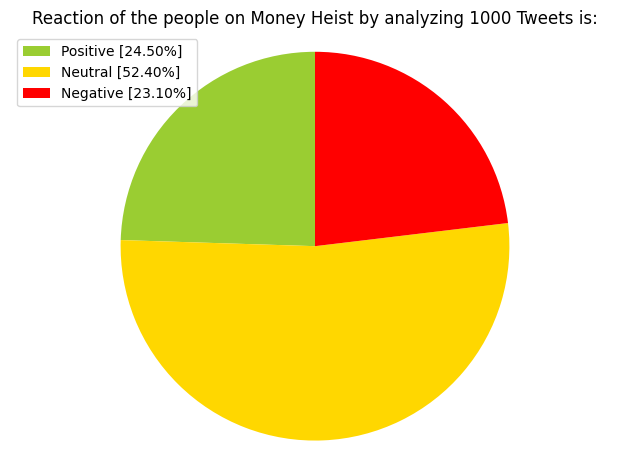

In [ ]:
labels = ['Positive ['+str(positive)+'%]',
          'Neutral ['+str(neutral)+'%]',
          'Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']

patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title('Reaction of the people on '
          + search_term +' by analyzing '
          + str(no_of_tweets) +' Tweets is:')
plt.axis('equal')
plt.tight_layout()
plt.show()